In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris["target"]==2).astype(np.float64)


In [3]:
svm_clf = Pipeline([
    ("Scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss="hinge")),
])
clf = svm_clf.fit(X,y)

In [4]:
decision_function = clf.decision_function(X)



In [5]:
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X[support_vector_indices]

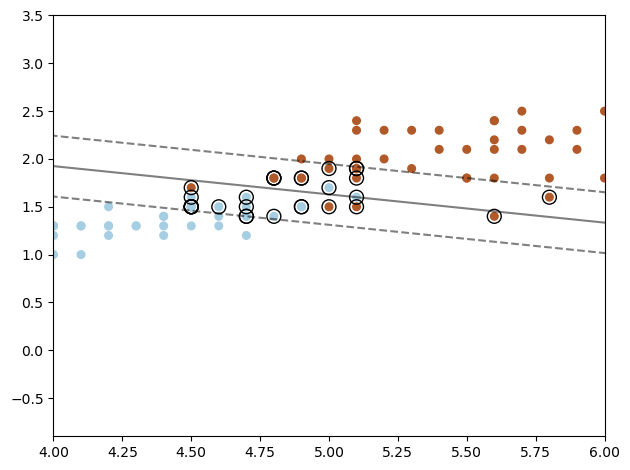

In [6]:
 plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
 plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
 ax = plt.gca()
 DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
plt.xlim(4.0, 6)
plt.tight_layout()

In [7]:
svm_clf.set_params(linear_svc__C=50)
clf2 = svm_clf.fit(X,y)
decision_function_2 = clf2.decision_function(X)
support_vector_indices_2 = np.where(np.abs(decision_function_2) <= 1 + 1e-15)[0]
support_vectors_2 = X[support_vector_indices_2]

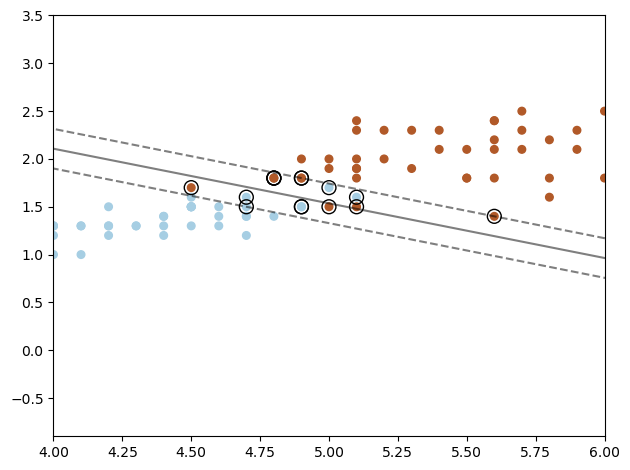

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.scatter(
        support_vectors_2[:, 0],
        support_vectors_2[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
        clf2,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
plt.xlim(4.0, 6)
plt.tight_layout()

## LinearSVC
- the LinearSVC class regularizes the bias term; the training set should be centered e.g. using StandardScaler|

## Nonlinear SVM Classification

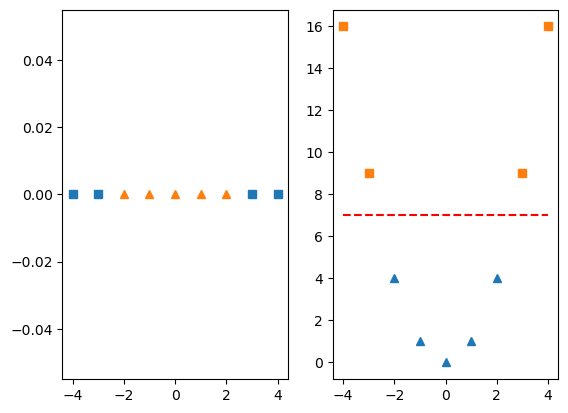

In [9]:
xorigin = np.linspace(-4,4,9)
val = 0
x1= xorigin[np.abs(xorigin)>2]
x0= xorigin[np.abs(xorigin)<=2]
y1= x1**2
y0 = x0**2
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(x1,np.zeros_like(x1)+val,'s')
ax1.plot(x0,np.zeros_like(x0)+val,'^')
ax2.plot(x0,y0,'^')
ax2.plot(x1,y1,'s')
y=np.ones(9)*7
ax2.plot(xorigin,y,'r--')

In [10]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [11]:
X,y = make_moons(n_samples=100,noise=0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=10,loss="hinge",max_iter=5000))
])
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=5000))])

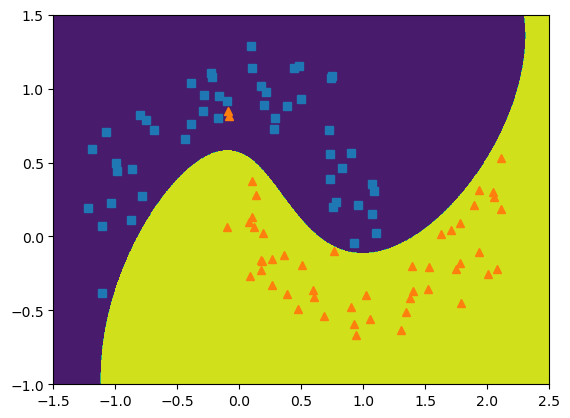

In [12]:
feature1,feature2 = np.meshgrid(
    np.linspace(-1.5,2.5,1000),
    np.linspace(-1.0,1.5,500)
)
testgrid = np.vstack([feature1.ravel(),feature2.ravel()]).T
ypredict = polynomial_svm_clf.predict(testgrid)
ypredict = np.reshape(ypredict,feature1.shape)
displaybound = DecisionBoundaryDisplay(xx0=feature1,xx1=feature2,response=ypredict)
displaybound.plot()
ind0 =(y==0)
plt.plot(X[ind0,0],X[ind0,1],'s')
ind1 =(y==1)
plt.plot(X[ind1,0],X[ind1,1],'^')

- **Kernel trick** is implemented SVC class of *sklearn*

In [13]:
from sklearn.svm import SVC 

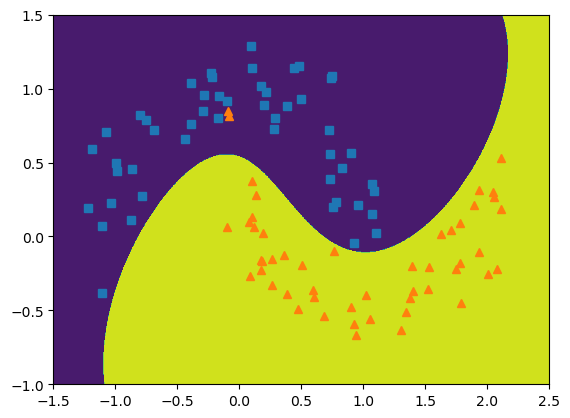

In [14]:
poly_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel ="poly",degree=3,coef0=1,C=5))
])
poly_kernel_svm_clf.fit(X,y)
ypredict1 = poly_kernel_svm_clf.predict(testgrid)
ypredict1 = np.reshape(ypredict1,feature1.shape)
displaybound1 = DecisionBoundaryDisplay(xx0=feature1,xx1=feature2,response=ypredict1)
displaybound1.plot()
plt.plot(X[ind0,0],X[ind0,1],'s')
plt.plot(X[ind1,0],X[ind1,1],'^')

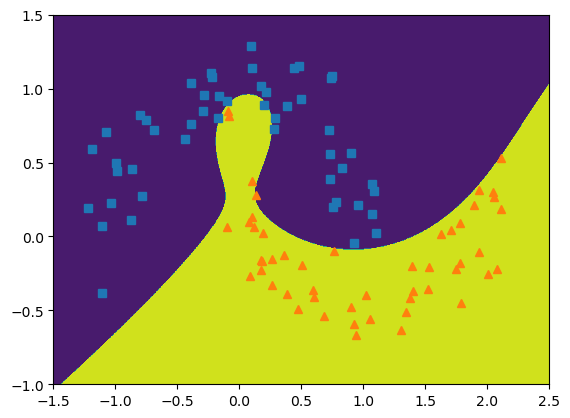

In [15]:
poly_kernel_svm_clf.set_params(svm_clf__degree = 10)
poly_kernel_svm_clf.set_params(svm_clf__coef0 = 100)
poly_kernel_svm_clf.fit(X,y)
ypredict2 = poly_kernel_svm_clf.predict(testgrid)
ypredict2 = np.reshape(ypredict2,feature1.shape)
displaybound2 = DecisionBoundaryDisplay(xx0=feature1,xx1=feature2,response=ypredict2)
displaybound2.plot()
plt.plot(X[ind0,0],X[ind0,1],'s')
plt.plot(X[ind1,0],X[ind1,1],'^')



- hyperparameter *coef0* controls how much the model is influenced by high-degree polynomials versus low-degree polynomials
- to find the right *coef0* is to grid search

### Similarity features
- to add features computed using a similarity function, which measures how much each instance resembles a particular landmark

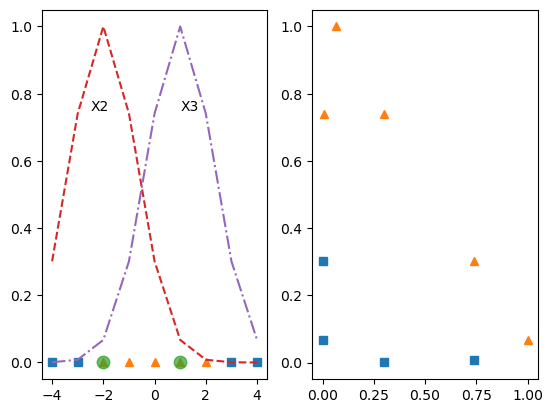

In [16]:
xorigin = np.linspace(-4,4,9)
x1= xorigin[np.abs(xorigin)>2]
x0= xorigin[np.abs(xorigin)<=2]
ind01 = np.abs(xorigin)>2
ind02 = np.abs(xorigin)<=2
val = 0
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(x1,np.zeros_like(x1)+val,'s')
ax1.plot(x0,np.zeros_like(x0)+val,'^')
x3= np.array([-2,1])
ax1.plot(x3,np.zeros_like(x3)+val,'o',markersize=9,alpha= 0.7)
gama = 0.3
y1 = np.exp(-gama*(xorigin+2)**2)
ax1.plot(xorigin,y1,'--')
ax1.text(-2.5,0.75,'X2')
y2 = np.exp(-gama*(xorigin-1)**2)
ax1.plot(xorigin,y2,'-.')
ax1.text(1,0.75,'X3')
XX2 = y1
XX3 = y2
ax2.plot(XX2[ind01],XX3[ind01],'s')
ax2.plot(XX2[ind02],XX3[ind02],'^')

### Gaussian RBF Kernel

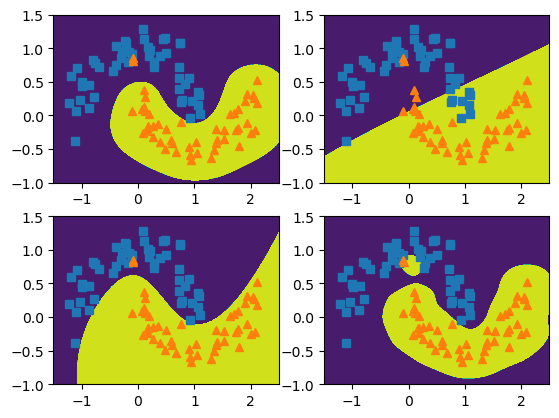

In [29]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf",gamma=5,C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)
ypredict_rbf_1 = rbf_kernel_svm_clf.predict(testgrid)
ypredict_rbf_1 = np.reshape(ypredict_rbf_1,feature1.shape)
fig1,axs= plt.subplots(2,2)
displaygrd1 = DecisionBoundaryDisplay(xx0=feature1,xx1=feature2,response=ypredict_rbf_1)
displaygrd1.plot(ax=axs[0,0])
axs[0,0].plot(X[ind0,0],X[ind0,1],'s')
axs[0,0].plot(X[ind1,0],X[ind1,1],'^')
rbf_kernel_svm_clf.set_params(svm_clf__gamma=0.1)
rbf_kernel_svm_clf.fit(X,y)
ypredict_rbf_2 = rbf_kernel_svm_clf.predict(testgrid)
ypredict_rbf_2 = np.reshape(ypredict_rbf_2,feature1.shape)
displaygrd2 = DecisionBoundaryDisplay(xx0=feature1,xx1=feature2,response=ypredict_rbf_2)
displaygrd2.plot(ax=axs[0,1])
axs[0,1].plot(X[ind0,0],X[ind0,1],'s')
axs[0,1].plot(X[ind1,0],X[ind1,1],'^')
rbf_kernel_svm_clf.set_params(svm_clf__C=1000)
rbf_kernel_svm_clf.fit(X,y)
ypredict_rbf_3 = rbf_kernel_svm_clf.predict(testgrid)
ypredict_rbf_3 = np.reshape(ypredict_rbf_3,feature1.shape)
displaygrd3 = DecisionBoundaryDisplay(xx0=feature1,xx1=feature2,response=ypredict_rbf_3)
displaygrd3.plot(ax=axs[1,0])
axs[1,0].plot(X[ind0,0],X[ind0,1],'s')
axs[1,0].plot(X[ind1,0],X[ind1,1],'^')
rbf_kernel_svm_clf.set_params(svm_clf__C=1000,svm_clf__gamma=5)
rbf_kernel_svm_clf.fit(X,y)
ypredict_rbf_4 = rbf_kernel_svm_clf.predict(testgrid)
ypredict_rbf_4 = np.reshape(ypredict_rbf_4,feature1.shape)
displaygrd4 = DecisionBoundaryDisplay(xx0=feature1,xx1=feature2,response=ypredict_rbf_4)
displaygrd4.plot(ax=axs[1,1])
axs[1,1].plot(X[ind0,0],X[ind0,1],'s')
axs[1,1].plot(X[ind1,0],X[ind1,1],'^')